<a href="https://colab.research.google.com/github/Cliffochi/aviva_data_science_course/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Problem 1] Determine the initial value of the center point

In [1]:
import numpy as np
from sklearn.datasets import make_blobs

class ScratchKMeans():
    """
    K-means scratch implementation

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """

    def __init__(self, n_clusters=3, n_init=10, max_iter=300, tol=1e-4, verbose=False):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centroids = None
        self.labels = None
        self.inertia_ = None

    def _initialize_centroids(self, X):
        """Randomly select n_clusters data points as initial centroids"""
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        return X[random_indices]

    def _compute_distances(self, X, centroids):
        """Compute squared Euclidean distances between each point and each centroid"""
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i, centroid in enumerate(centroids):
            distances[:, i] = np.sum((X - centroid) ** 2, axis=1)
        return distances

    def _assign_clusters(self, distances):
        """Assign each point to the nearest centroid"""
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        """Compute new centroids as the mean of points in each cluster"""
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            new_centroids[i] = np.mean(X[labels == i], axis=0)
        return new_centroids

    def _compute_inertia(self, X, labels, centroids):
        """Compute total within-cluster sum of squares"""
        inertia = 0
        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            inertia += np.sum((cluster_points - centroids[i]) ** 2)
        return inertia

    def fit(self, X):
        """
        Calculate clustering by K-means

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of training data
        """
        best_inertia = np.inf
        best_centroids = None
        best_labels = None

        for init in range(self.n_init):
            if self.verbose:
                print(f"Initialization {init + 1}/{self.n_init}")

            # Initialize centroids
            centroids = self._initialize_centroids(X)

            for iteration in range(self.max_iter):
                # Assign clusters
                distances = self._compute_distances(X, centroids)
                labels = self._assign_clusters(distances)

                # Update centroids
                new_centroids = self._update_centroids(X, labels)

                # Check for convergence
                centroid_shift = np.sum((new_centroids - centroids) ** 2)
                if centroid_shift < self.tol:
                    if self.verbose:
                        print(f"Converged at iteration {iteration}")
                    break

                centroids = new_centroids

            # Calculate inertia for this run
            inertia = self._compute_inertia(X, labels, centroids)

            # Keep track of best solution
            if inertia < best_inertia:
                best_inertia = inertia
                best_centroids = centroids
                best_labels = labels

        # Store the best results
        self.centroids = best_centroids
        self.labels = best_labels
        self.inertia_ = best_inertia

        if self.verbose:
            print(f"Best inertia: {best_inertia:.4f}")

    def predict(self, X):
        """
        Calculate which cluster the input data belongs to

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Data to predict clusters for

        Returns
        -------
        ndarray, shape (n_samples,)
            Index of the cluster each sample belongs to
        """
        distances = self._compute_distances(X, self.centroids)
        return self._assign_clusters(distances)

###Explanation

- Initialization (_initialize_centroids):

Randomly selects n_clusters data points as initial centroids

- Distance Calculation (_compute_distances):

Computes squared Euclidean distances between each point and each centroid

- Cluster Assignment (_assign_clusters):

Assigns each point to the nearest centroid

- Centroid Update (_update_centroids):

Computes new centroids as the mean of points in each cluster

- Inertia Calculation (_compute_inertia):

Computes total within-cluster sum of squares (inertia)

- Main Fit Method:

Runs K-means n_init times with different initializations

Keeps track of the best solution (lowest inertia)

Stops iterations when centroid movement is below tol or max_iter is reached

- Predict Method:

Assigns new points to clusters based on learned centroids

Initialization 1/10
Converged at iteration 6
Initialization 2/10
Converged at iteration 3
Initialization 3/10
Converged at iteration 2
Initialization 4/10
Converged at iteration 3
Initialization 5/10
Converged at iteration 3
Initialization 6/10
Converged at iteration 6
Initialization 7/10
Converged at iteration 3
Initialization 8/10
Converged at iteration 5
Initialization 9/10
Converged at iteration 5
Initialization 10/10
Converged at iteration 5
Best inertia: 48.6338


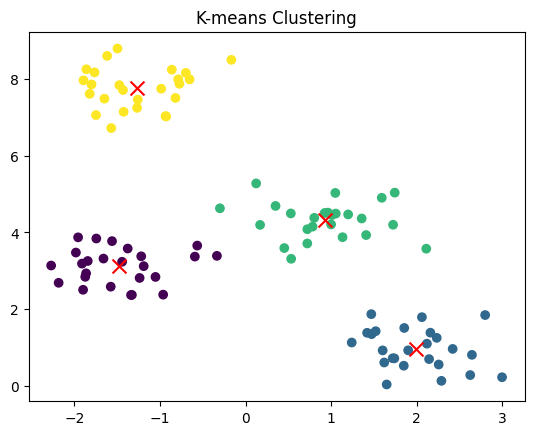

In [2]:
# Example usage
# Create artificial dataset
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

# Initialize and fit K-means
kmeans = ScratchKMeans(n_clusters=4, n_init=10, max_iter=300, tol=1e-4, verbose=True)
kmeans.fit(X)

# Predict clusters
labels = kmeans.predict(X)

# Visualize results
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='x', s=100)
plt.title("K-means Clustering")
plt.show()

To complete the K-means implementation, we'll add the SSE (Sum of Squared Errors) calculation function. SSE is also known as "inertia" in scikit-learn terminology.

[Problem 2] Creation of a function to obtain SSE

In [3]:
# SSE implementation
def _compute_sse(self, X, labels, centroids):
    """
    Calculate the sum of squared errors (SSE) for the current clustering

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Input data
    labels : ndarray, shape (n_samples,)
        Cluster labels for each point
    centroids : ndarray, shape (n_clusters, n_features)
        Current cluster centers

    Returns
    -------
    float : SSE value
    """
    sse = 0.0
    for k in range(self.n_clusters):
        # Get all points assigned to this cluster
        cluster_points = X[labels == k]

        # Calculate squared distances to centroid
        if len(cluster_points) > 0:
            squared_distances = np.sum((cluster_points - centroids[k])**2, axis=1)
            sse += np.sum(squared_distances)

    return sse

In [4]:
# Here's the complete class with SSE calculation integrated:
import numpy as np

class ScratchKMeans():
    """
    Complete K-means scratch implementation with SSE calculation
    """

    def __init__(self, n_clusters=3, n_init=10, max_iter=300, tol=1e-4, verbose=False):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centroids = None
        self.labels = None
        self.inertia_ = None  # This will store the final SSE

    def _initialize_centroids(self, X):
        """Randomly select initial centroids from data points"""
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        return X[random_indices]

    def _compute_sse(self, X, labels, centroids):
        """Calculate sum of squared errors for current clustering"""
        sse = 0.0
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            if len(cluster_points) > 0:
                sse += np.sum(np.sum((cluster_points - centroids[k])**2, axis=1))
        return sse

    def fit(self, X):
        """Perform K-means clustering"""
        best_sse = np.inf
        best_centroids = None
        best_labels = None

        for init in range(self.n_init):
            if self.verbose:
                print(f"Initialization {init + 1}/{self.n_init}")

            # Initialize centroids
            centroids = self._initialize_centroids(X)

            for iteration in range(self.max_iter):
                # Assign points to nearest centroid
                distances = np.zeros((X.shape[0], self.n_clusters))
                for k in range(self.n_clusters):
                    distances[:, k] = np.sum((X - centroids[k])**2, axis=1)
                labels = np.argmin(distances, axis=1)

                # Update centroids
                new_centroids = np.zeros_like(centroids)
                for k in range(self.n_clusters):
                    if np.sum(labels == k) > 0:
                        new_centroids[k] = np.mean(X[labels == k], axis=0)
                    else:
                        new_centroids[k] = centroids[k]  # Keep old centroid if cluster is empty

                # Check for convergence
                centroid_shift = np.sum((new_centroids - centroids)**2)
                if centroid_shift < self.tol:
                    if self.verbose:
                        print(f"Converged at iteration {iteration}")
                    break

                centroids = new_centroids

            # Calculate SSE for this run
            current_sse = self._compute_sse(X, labels, centroids)

            # Keep track of best solution
            if current_sse < best_sse:
                best_sse = current_sse
                best_centroids = centroids
                best_labels = labels

        # Store the best results
        self.centroids = best_centroids
        self.labels = best_labels
        self.inertia_ = best_sse

        if self.verbose:
            print(f"Best SSE: {best_sse:.4f}")

    def predict(self, X):
        """Predict cluster labels for new data"""
        distances = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            distances[:, k] = np.sum((X - self.centroids[k])**2, axis=1)
        return np.argmin(distances, axis=1)

###Explanation
- SSE Calculation:

For each cluster, calculates the sum of squared distances between points and their centroid

Sums these values across all clusters to get total SSE

Lower SSE indicates better clustering (points are closer to their centroids)

- Optimization Process:

The algorithm alternates between:

Assigning points to nearest centroids (minimizing SSE for fixed centroids)

Updating centroids to be the mean of their points (minimizing SSE for fixed assignments)

Repeats until centroids stop moving significantly (less than tol)

- Multiple Initializations:

Runs K-means n_init times with different random starting points

Keeps the solution with the lowest SSE (best clustering)

In [5]:
# Example
from sklearn.datasets import make_blobs

# Create sample data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# Initialize and fit K-means
kmeans = ScratchKMeans(n_clusters=4, n_init=10, verbose=True)
kmeans.fit(X)

# Results
print("Final centroids:\n", kmeans.centroids)
print("Final SSE:", kmeans.inertia_)

# Predict clusters for new data
new_data = np.array([[0, 0], [4, 4]])
print("Predicted clusters:", kmeans.predict(new_data))

Initialization 1/10
Converged at iteration 3
Initialization 2/10
Converged at iteration 3
Initialization 3/10
Converged at iteration 3
Initialization 4/10
Converged at iteration 6
Initialization 5/10
Converged at iteration 7
Initialization 6/10
Converged at iteration 3
Initialization 7/10
Converged at iteration 4
Initialization 8/10
Converged at iteration 15
Initialization 9/10
Converged at iteration 5
Initialization 10/10
Converged at iteration 9
Best SSE: 212.0060
Final centroids:
 [[-1.58438467  2.83081263]
 [-1.37324398  7.75368871]
 [ 0.94973532  4.41906906]
 [ 1.98258281  0.86771314]]
Final SSE: 212.0059962108348
Predicted clusters: [3 2]


[Problem 3] Allocation to cluster

In [6]:
# Implementing Cluster Assignment in K-Means
import numpy as np

class ScratchKMeans():
    """
    K-means implementation with cluster assignment
    """

    def __init__(self, n_clusters=3, n_init=10, max_iter=300, tol=1e-4, verbose=False):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centroids = None
        self.labels = None
        self.inertia_ = None

    def _assign_to_nearest_centroid(self, X, centroids):
        """
        Assign each data point to the nearest centroid

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Input data
        centroids : ndarray, shape (n_clusters, n_features)
            Current cluster centers

        Returns
        -------
        ndarray, shape (n_samples,)
            Cluster indices for each point
        """
        # Initialize array to store distances
        distances = np.zeros((X.shape[0], self.n_clusters))

        # Calculate distance from each point to each centroid
        for k in range(self.n_clusters):
            distances[:, k] = np.linalg.norm(X - centroids[k], axis=1)

        # Assign to nearest centroid
        return np.argmin(distances, axis=1)

    def _initialize_centroids(self, X):
        """Randomly select initial centroids from data points"""
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        return X[random_indices]

    def fit(self, X):
        """Perform K-means clustering"""
        best_sse = np.inf
        best_centroids = None
        best_labels = None

        for init in range(self.n_init):
            if self.verbose:
                print(f"Initialization {init + 1}/{self.n_init}")

            # Initialize centroids
            centroids = self._initialize_centroids(X)

            for iteration in range(self.max_iter):
                # Assign points to nearest centroids
                labels = self._assign_to_nearest_centroid(X, centroids)

                # Update centroids
                new_centroids = np.zeros_like(centroids)
                for k in range(self.n_clusters):
                    if np.sum(labels == k) > 0:
                        new_centroids[k] = np.mean(X[labels == k], axis=0)
                    else:
                        new_centroids[k] = centroids[k]  # Keep old centroid if cluster is empty

                # Check for convergence
                centroid_shift = np.sum((new_centroids - centroids)**2)
                if centroid_shift < self.tol:
                    if self.verbose:
                        print(f"Converged at iteration {iteration}")
                    break

                centroids = new_centroids

            # Calculate SSE for this run
            current_sse = 0
            for k in range(self.n_clusters):
                cluster_points = X[labels == k]
                if len(cluster_points) > 0:
                    current_sse += np.sum(np.linalg.norm(cluster_points - centroids[k], axis=1)**2)

            # Keep track of best solution
            if current_sse < best_sse:
                best_sse = current_sse
                best_centroids = centroids
                best_labels = labels

        # Store the best results
        self.centroids = best_centroids
        self.labels = best_labels
        self.inertia_ = best_sse

        if self.verbose:
            print(f"Best SSE: {best_sse:.4f}")

    def predict(self, X):
        """Predict cluster labels for new data"""
        return self._assign_to_nearest_centroid(X, self.centroids)

###Explanation
- Cluster Assignment (_assign_to_nearest_centroid):

Uses np.linalg.norm to calculate Euclidean distances between each point and all centroids

Returns the index of the nearest centroid for each point

Vectorized implementation for efficiency

- Distance Calculation:

For point x and centroid μ: distance = ∥x - μ∥ = √Σ(xᵢ - μᵢ)²

We use the squared distances for SSE calculation (but not for assignment)

- Optimization Process:

Alternates between assigning points to nearest centroids and updating centroids

Stops when centroids move less than tol or max_iter is reached

- Multiple Initializations:

Runs K-means n_init times with different random starting points

Keeps the solution with the lowest SSE (best clustering)

Initialization 1/10
Converged at iteration 15
Initialization 2/10
Converged at iteration 3
Initialization 3/10
Converged at iteration 5
Initialization 4/10
Converged at iteration 7
Initialization 5/10
Converged at iteration 3
Initialization 6/10
Converged at iteration 6
Initialization 7/10
Converged at iteration 2
Initialization 8/10
Converged at iteration 14
Initialization 9/10
Converged at iteration 3
Initialization 10/10
Converged at iteration 8
Best SSE: 212.0060


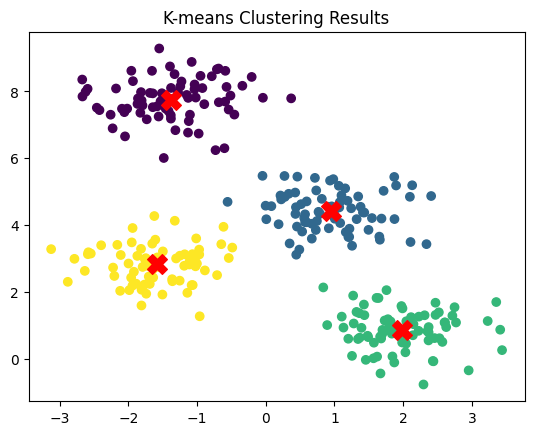

Predicted clusters: [2 2]


In [7]:
# Example
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Create sample data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# Initialize and fit K-means
kmeans = ScratchKMeans(n_clusters=4, n_init=10, verbose=True)
kmeans.fit(X)

# Visualize results
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='X', s=200)
plt.title("K-means Clustering Results")
plt.show()

# Predict new points
new_points = np.array([[0, 0], [3, 3]])
print("Predicted clusters:", kmeans.predict(new_points))

[Problem 4] Movement of the center point

In [8]:
import numpy as np

class ScratchKMeans():
    """
    K-means implementation with centroid movement
    """

    def __init__(self, n_clusters=3, n_init=10, max_iter=300, tol=1e-4, verbose=False):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centroids = None
        self.labels = None
        self.inertia_ = None

    def _assign_to_nearest_centroid(self, X, centroids):
        """Assign each data point to the nearest centroid"""
        distances = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            distances[:, k] = np.linalg.norm(X - centroids[k], axis=1)
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        """
        Move centroids to the mean (center of gravity) of their assigned points

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Input data
        labels : ndarray, shape (n_samples,)
            Current cluster assignments

        Returns
        -------
        ndarray, shape (n_clusters, n_features)
            Updated centroids
        """
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            # Get all points assigned to this cluster
            cluster_points = X[labels == k]

            # If cluster has points, compute mean; otherwise keep old centroid
            if len(cluster_points) > 0:
                new_centroids[k] = np.mean(cluster_points, axis=0)
            else:
                # Handle empty clusters (optional: could reinitialize)
                new_centroids[k] = self.centroids[k] if self.centroids is not None else X[np.random.randint(X.shape[0])]

        return new_centroids

    def _initialize_centroids(self, X):
        """Randomly select initial centroids from data points"""
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        return X[random_indices]

    def fit(self, X):
        """Perform K-means clustering"""
        best_sse = np.inf
        best_centroids = None
        best_labels = None

        for init in range(self.n_init):
            if self.verbose:
                print(f"Initialization {init + 1}/{self.n_init}")

            # Initialize centroids
            centroids = self._initialize_centroids(X)

            for iteration in range(self.max_iter):
                # Assign points to nearest centroids
                labels = self._assign_to_nearest_centroid(X, centroids)

                # Update centroids to their cluster's center of gravity
                new_centroids = self._update_centroids(X, labels)

                # Check for convergence
                centroid_shift = np.sum((new_centroids - centroids)**2)
                if centroid_shift < self.tol:
                    if self.verbose:
                        print(f"Converged at iteration {iteration}")
                    break

                centroids = new_centroids

            # Calculate SSE for this run
            current_sse = 0
            for k in range(self.n_clusters):
                cluster_points = X[labels == k]
                if len(cluster_points) > 0:
                    current_sse += np.sum(np.linalg.norm(cluster_points - centroids[k], axis=1)**2)

            # Keep track of best solution
            if current_sse < best_sse:
                best_sse = current_sse
                best_centroids = centroids
                best_labels = labels

        # Store the best results
        self.centroids = best_centroids
        self.labels = best_labels
        self.inertia_ = best_sse

        if self.verbose:
            print(f"Best SSE: {best_sse:.4f}")

    def predict(self, X):
        """Predict cluster labels for new data"""
        return self._assign_to_nearest_centroid(X, self.centroids)

###Explanation
- Centroid Update (_update_centroids):

For each cluster, calculates the mean of all points assigned to it

This mean becomes the new centroid position (center of gravity)

Handles empty clusters by keeping the previous centroid position

- Optimization Process:

The algorithm alternates between:

Assigning points to nearest centroids (E-step)

Moving centroids to their cluster's mean (M-step)

This minimizes SSE by finding local optima

- onvergence Check:

Stops when centroids move less than tol (tolerance)

Also stops if max_iter is reached

Initialization 1/10
Converged at iteration 7
Initialization 2/10
Converged at iteration 4
Initialization 3/10
Converged at iteration 14
Initialization 4/10
Converged at iteration 2
Initialization 5/10
Converged at iteration 16
Initialization 6/10
Converged at iteration 5
Initialization 7/10
Converged at iteration 2
Initialization 8/10
Converged at iteration 3
Initialization 9/10
Converged at iteration 3
Initialization 10/10
Converged at iteration 5
Best SSE: 212.0060


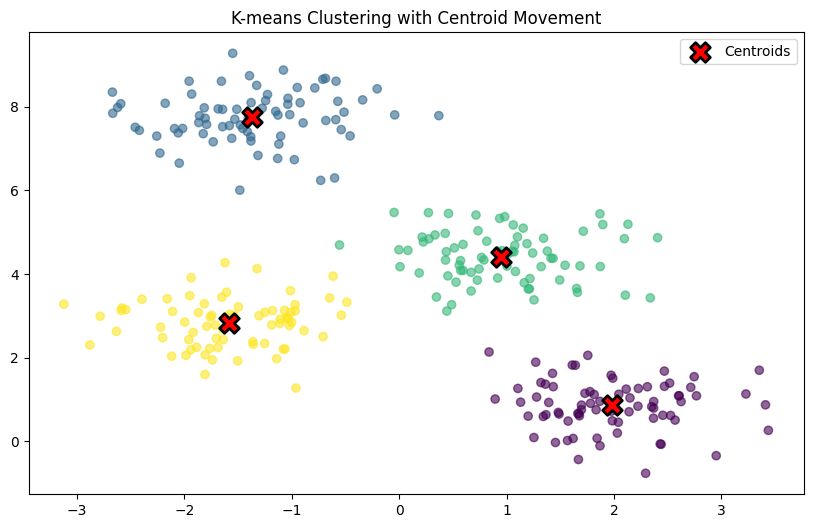

Final centroids:
[[ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]
 [ 0.94973532  4.41906906]
 [-1.58438467  2.83081263]]


In [9]:
# Example

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Create sample data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# Initialize and fit K-means
kmeans = ScratchKMeans(n_clusters=4, n_init=10, verbose=True)
kmeans.fit(X)

# Visualize results
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1],
            c='red', marker='X', s=200, linewidths=2,
            edgecolors='black', label='Centroids')
plt.title("K-means Clustering with Centroid Movement")
plt.legend()
plt.show()

# Print final centroids
print("Final centroids:")
print(kmeans.centroids)

###[Problem 5] Repeat

Write code that learns by repeatedly assigning to the cluster and moving the center point.

In [10]:
import numpy as np

class ScratchKMeans():
    """
    Complete K-means implementation with iterative learning and stopping conditions
    """

    def __init__(self, n_clusters=3, n_init=10, max_iter=300, tol=1e-4, verbose=False):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centroids = None
        self.labels = None
        self.inertia_ = None
        self.n_iter_ = 0  # Track actual iterations used

    def _assign_to_nearest_centroid(self, X, centroids):
        """Assign each data point to the nearest centroid"""
        distances = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            distances[:, k] = np.linalg.norm(X - centroids[k], axis=1)
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels, current_centroids):
        """Update centroids to be the mean of their assigned points"""
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            if len(cluster_points) > 0:
                new_centroids[k] = np.mean(cluster_points, axis=0)
            else:
                # Handle empty clusters by keeping previous centroid
                new_centroids[k] = current_centroids[k]
        return new_centroids

    def _initialize_centroids(self, X):
        """Randomly select initial centroids from data points"""
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        return X[random_indices]

    def _run_single_kmeans(self, X):
        """Run one complete K-means clustering with stopping conditions"""
        centroids = self._initialize_centroids(X)
        prev_centroids = centroids.copy()

        for iteration in range(self.max_iter):
            # Assign points to nearest centroids
            labels = self._assign_to_nearest_centroid(X, centroids)

            # Update centroids
            centroids = self._update_centroids(X, labels, centroids)

            # Calculate centroid movement
            centroid_shift = np.sum((centroids - prev_centroids) ** 2)

            if self.verbose:
                print(f"Iteration {iteration + 1}: Centroid shift = {centroid_shift:.6f}")

            # Check stopping conditions
            if centroid_shift < self.tol:
                if self.verbose:
                    print(f"Converged after {iteration + 1} iterations")
                self.n_iter_ = iteration + 1
                break

            prev_centroids = centroids.copy()
        else:
            self.n_iter_ = self.max_iter
            if self.verbose:
                print(f"Reached max iterations ({self.max_iter})")

        # Calculate final SSE
        sse = 0
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            if len(cluster_points) > 0:
                sse += np.sum(np.linalg.norm(cluster_points - centroids[k], axis=1) ** 2)

        return centroids, labels, sse

    def fit(self, X):
        """Perform K-means clustering with multiple initializations"""
        best_sse = np.inf
        best_centroids = None
        best_labels = None

        for init in range(self.n_init):
            if self.verbose:
                print(f"\nInitialization {init + 1}/{self.n_init}")

            # Run K-means with current initialization
            centroids, labels, sse = self._run_single_kmeans(X)

            # Keep track of best solution
            if sse < best_sse:
                best_sse = sse
                best_centroids = centroids
                best_labels = labels
                if self.verbose:
                    print(f"New best SSE: {best_sse:.4f}")

        # Store the best results
        self.centroids = best_centroids
        self.labels = best_labels
        self.inertia_ = best_sse

        if self.verbose:
            print(f"\nBest SSE across all initializations: {best_sse:.4f}")

    def predict(self, X):
        """Predict cluster labels for new data"""
        return self._assign_to_nearest_centroid(X, self.centroids)

###Explanation
- Iterative Learning Process:

Alternates between assignment step and centroid update step

Continues until stopping conditions are met

- Stopping Conditions:

Maximum iterations: Stops when max_iter is reached

Tolerance: Stops when centroid movement is less than tol

Tracks actual iterations used in n_iter_

- Verbose Output:

Shows iteration progress and convergence status

Reports best SSE across initializations

- Complete Workflow:

Multiple initializations (n_init)

Full K-means iteration for each initialization

Keeps best solution (lowest SSE)

[Problem 6] Calculate with different initial values

In [11]:
import numpy as np

class ScratchKMeans():
    """
    K-means implementation with multiple initializations
    """

    def __init__(self, n_clusters=3, n_init=10, max_iter=300, tol=1e-4, verbose=False):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centroids = None
        self.labels = None
        self.inertia_ = np.inf  # Initialize with worst possible SSE
        self.best_iterations_ = 0  # Track iterations for best run

    def _initialize_centroids(self, X):
        """Randomly select initial centroids from data points"""
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        return X[random_indices]

    def _compute_sse(self, X, labels, centroids):
        """Compute sum of squared errors for current clustering"""
        sse = 0.0
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            if len(cluster_points) > 0:
                sse += np.sum(np.sum((cluster_points - centroids[k])**2, axis=1))
        return sse

    def _run_kmeans(self, X):
        """Run single K-means clustering with random initialization"""
        centroids = self._initialize_centroids(X)
        prev_centroids = centroids.copy()

        for iteration in range(self.max_iter):
            # Assign points to nearest centroids
            distances = np.zeros((X.shape[0], self.n_clusters))
            for k in range(self.n_clusters):
                distances[:, k] = np.sum((X - centroids[k])**2, axis=1)
            labels = np.argmin(distances, axis=1)

            # Update centroids
            new_centroids = np.zeros_like(centroids)
            for k in range(self.n_clusters):
                cluster_points = X[labels == k]
                if len(cluster_points) > 0:
                    new_centroids[k] = np.mean(cluster_points, axis=0)
                else:
                    new_centroids[k] = centroids[k]  # Keep old centroid if cluster is empty

            # Check convergence
            centroid_shift = np.sum((new_centroids - centroids)**2)
            if centroid_shift < self.tol:
                if self.verbose:
                    print(f"Converged at iteration {iteration + 1}")
                break

            centroids = new_centroids

        # Calculate final SSE
        sse = self._compute_sse(X, labels, centroids)
        return centroids, labels, sse, iteration + 1

    def fit(self, X):
        """Run K-means with multiple initializations and keep best solution"""
        for init in range(self.n_init):
            if self.verbose:
                print(f"\nInitialization {init + 1}/{self.n_init}")

            # Run K-means with current initialization
            centroids, labels, sse, n_iter = self._run_kmeans(X)

            # Keep track of best solution
            if sse < self.inertia_:
                self.inertia_ = sse
                self.centroids = centroids
                self.labels = labels
                self.best_iterations_ = n_iter
                if self.verbose:
                    print(f"New best SSE: {sse:.4f}")

        if self.verbose:
            print(f"\nBest SSE across all initializations: {self.inertia_:.4f}")
            print(f"Best solution converged in {self.best_iterations_} iterations")

    def predict(self, X):
        """Predict cluster labels for new data"""
        distances = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            distances[:, k] = np.sum((X - self.centroids[k])**2, axis=1)
        return np.argmin(distances, axis=1)

###Explanation
- Multiple Initializations:

Runs K-means n_init times with different random starting points

Each initialization may lead to different local optima

- Best Solution Selection:

Tracks the solution with the lowest SSE (inertia_)

Stores centroids and labels from the best run

Records number of iterations for the best run

- Verbose Output:

Shows progress of each initialization

Reports when a new best solution is found

Displays final best SSE and iteration count

- Complete Workflow:

Initialization → Assignment → Update → Convergence check

Repeats for each initialization

Selects and stores best solution

###[Problem 7] Estimate
When estimating which cluster to belong to for new data, do the same as in the first phase of training.

In [12]:
import numpy as np

class ScratchKMeans():
    """
    Complete K-means implementation with prediction functionality
    """

    def __init__(self, n_clusters=3, n_init=10, max_iter=300, tol=1e-4, verbose=False):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centroids = None
        self.labels = None
        self.inertia_ = None

    def _initialize_centroids(self, X):
        """Randomly select initial centroids from data points"""
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        return X[random_indices]

    def _compute_distances(self, X, centroids):
        """Compute squared Euclidean distances between points and centroids"""
        distances = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            distances[:, k] = np.sum((X - centroids[k])**2, axis=1)
        return distances

    def _assign_clusters(self, distances):
        """Assign each point to the nearest centroid"""
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        """Update centroids to be the mean of their assigned points"""
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            if len(cluster_points) > 0:
                new_centroids[k] = np.mean(cluster_points, axis=0)
            else:
                new_centroids[k] = self.centroids[k]  # Keep old centroid if cluster is empty
        return new_centroids

    def fit(self, X):
        """Perform K-means clustering"""
        best_inertia = np.inf
        best_centroids = None
        best_labels = None

        for init in range(self.n_init):
            if self.verbose:
                print(f"Initialization {init + 1}/{self.n_init}")

            # Initialize centroids
            centroids = self._initialize_centroids(X)

            for iteration in range(self.max_iter):
                # Assign points to nearest centroids
                distances = self._compute_distances(X, centroids)
                labels = self._assign_clusters(distances)

                # Update centroids
                new_centroids = self._update_centroids(X, labels)

                # Check for convergence
                centroid_shift = np.sum((new_centroids - centroids)**2)
                if centroid_shift < self.tol:
                    if self.verbose:
                        print(f"Converged at iteration {iteration}")
                    break

                centroids = new_centroids

            # Calculate inertia for this run
            inertia = 0
            for k in range(self.n_clusters):
                cluster_points = X[labels == k]
                if len(cluster_points) > 0:
                    inertia += np.sum((cluster_points - centroids[k])**2)

            # Keep track of best solution
            if inertia < best_inertia:
                best_inertia = inertia
                best_centroids = centroids
                best_labels = labels

        # Store the best results
        self.centroids = best_centroids
        self.labels = best_labels
        self.inertia_ = best_inertia

        if self.verbose:
            print(f"Best inertia: {best_inertia:.4f}")

    def predict(self, X):
        """
        Predict cluster labels for new data

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            New data to predict clusters for

        Returns
        -------
        ndarray, shape (n_samples,)
            Predicted cluster indices
        """
        if self.centroids is None:
            raise ValueError("Model not fitted yet. Call fit() first.")

        # Compute distances to each centroid (same as training phase)
        distances = self._compute_distances(X, self.centroids)

        # Assign to nearest centroid (same as training phase)
        return self._assign_clusters(distances)

###Explanation

- Prediction Process (predict method):

Uses the same distance calculation as training (_compute_distances)

Applies the same cluster assignment logic (_assign_clusters)

Essentially performs exactly the first phase of training (assignment step)

- Distance Calculation:

Computes squared Euclidean distance between each point and each centroid

Uses vectorized operations for efficiency

- Cluster Assignment:

Assigns each point to the centroid with smallest distance

Returns array of cluster indices (0 to n_clusters-1)

- Error Handling:

Checks if model has been fitted before predicting

Raises informative error if predict called before fit

###[Problem 8] Implementation of elbow method

K=1: SSE = 2812.14
K=2: SSE = 1190.78
K=3: SSE = 546.89
K=4: SSE = 212.01
K=5: SSE = 188.77
K=6: SSE = 170.95
K=7: SSE = 154.87
K=8: SSE = 139.21


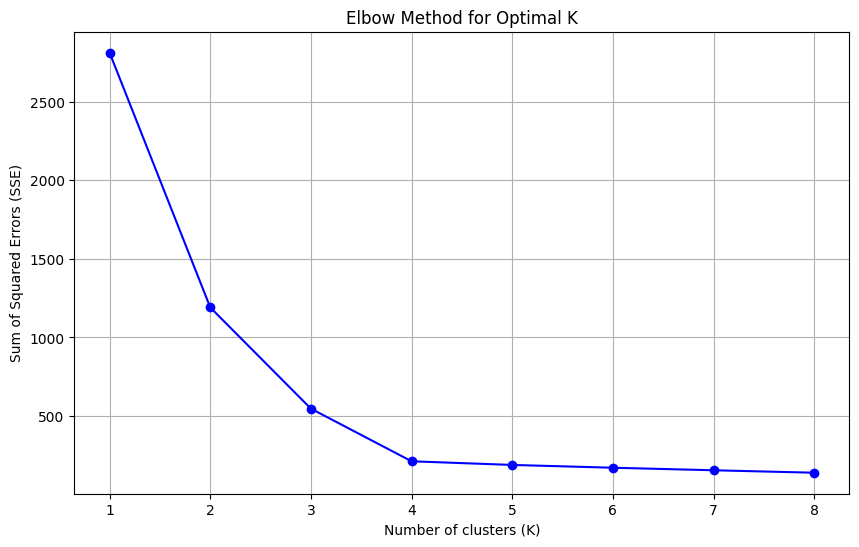


Suggested optimal K: 1

Running K-means with optimal K...
Initialization 1/10
Converged at iteration 1
Initialization 2/10
Converged at iteration 1
Initialization 3/10
Converged at iteration 1
Initialization 4/10
Converged at iteration 1
Initialization 5/10
Converged at iteration 1
Initialization 6/10
Converged at iteration 1
Initialization 7/10
Converged at iteration 1
Initialization 8/10
Converged at iteration 1
Initialization 9/10
Converged at iteration 1
Initialization 10/10
Converged at iteration 1
Best inertia: 2812.1376


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

class ScratchKMeans():
    """
    Complete K-means implementation with prediction functionality
    """

    def __init__(self, n_clusters=3, n_init=10, max_iter=300, tol=1e-4, verbose=False):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centroids = None
        self.labels = None
        self.inertia_ = None

    def _initialize_centroids(self, X):
        """Randomly select initial centroids from data points"""
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        return X[random_indices]

    def _compute_distances(self, X, centroids):
        """Compute squared Euclidean distances between points and centroids"""
        distances = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            distances[:, k] = np.sum((X - centroids[k])**2, axis=1)
        return distances

    def _assign_clusters(self, distances):
        """Assign each point to the nearest centroid"""
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        """Update centroids to be the mean of their assigned points"""
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            if len(cluster_points) > 0:
                new_centroids[k] = np.mean(cluster_points, axis=0)
            else:
                new_centroids[k] = self.centroids[k]  # Keep old centroid if cluster is empty
        return new_centroids

    def fit(self, X):
        """Perform K-means clustering"""
        best_inertia = np.inf
        best_centroids = None
        best_labels = None

        for init in range(self.n_init):
            if self.verbose:
                print(f"Initialization {init + 1}/{self.n_init}")

            # Initialize centroids
            centroids = self._initialize_centroids(X)

            for iteration in range(self.max_iter):
                # Assign points to nearest centroids
                distances = self._compute_distances(X, centroids)
                labels = self._assign_clusters(distances)

                # Update centroids
                new_centroids = self._update_centroids(X, labels)

                # Check for convergence
                centroid_shift = np.sum((new_centroids - centroids)**2)
                if centroid_shift < self.tol:
                    if self.verbose:
                        print(f"Converged at iteration {iteration}")
                    break

                centroids = new_centroids

            # Calculate inertia for this run
            inertia = 0
            for k in range(self.n_clusters):
                cluster_points = X[labels == k]
                if len(cluster_points) > 0:
                    inertia += np.sum((cluster_points - centroids[k])**2)

            # Keep track of best solution
            if inertia < best_inertia:
                best_inertia = inertia
                best_centroids = centroids
                best_labels = labels

        # Store the best results
        self.centroids = best_centroids
        self.labels = best_labels
        self.inertia_ = best_inertia

        if self.verbose:
            print(f"Best inertia: {best_inertia:.4f}")

    def predict(self, X):
        """
        Predict cluster labels for new data

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            New data to predict clusters for

        Returns
        -------
        ndarray, shape (n_samples,)
            Predicted cluster indices
        """
        if self.centroids is None:
            raise ValueError("Model not fitted yet. Call fit() first.")

        # Compute distances to each centroid (same as training phase)
        distances = self._compute_distances(X, self.centroids)

        # Assign to nearest centroid (same as training phase)
        return self._assign_clusters(distances)

def find_optimal_k(X, max_k=10, n_init=10, random_state=None):
    """
    Determine optimal number of clusters using elbow method

    Parameters:
    X : Input data (n_samples, n_features)
    max_k : Maximum number of clusters to try
    n_init : Number of initializations for K-means
    random_state : Random seed for reproducibility

    Returns:
    optimal_k : Suggested number of clusters
    """
    sse_values = []
    k_values = range(1, max_k+1)

    for k in k_values:
        if random_state is not None:
            np.random.seed(random_state)

        # Fit K-means with current k
        kmeans = ScratchKMeans(n_clusters=k, n_init=n_init, verbose=False)
        kmeans.fit(X)
        sse_values.append(kmeans.inertia_)

        print(f"K={k}: SSE = {kmeans.inertia_:.2f}")

    # Plot the elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, sse_values, 'bo-')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.title('Elbow Method for Optimal K')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()

    # Calculate the "elbow point" (simple derivative method)
    deltas = np.diff(sse_values)
    optimal_k = np.argmax(deltas < (0.5 * deltas[0])) + 1  # +1 because diff reduces length

    print(f"\nSuggested optimal K: {optimal_k}")
    return optimal_k

# Example usage:
if __name__ == "__main__":
    # Generate sample data
    X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

    # Find optimal K
    optimal_k = find_optimal_k(X, max_k=8, random_state=42)

    # Run K-means with optimal K
    print("\nRunning K-means with optimal K...")
    final_kmeans = ScratchKMeans(n_clusters=optimal_k, n_init=10, verbose=True)
    final_kmeans.fit(X)

###Explanation
- SSE Tracking:

The ScratchKMeans class already stores SSE in inertia_ (from Problem 2)

We use this value for the elbow method

- Elbow Method Implementation:

Tests K values from 1 to max_k

Records SSE for each K

Plots SSE vs K to visualize the "elbow"

- Automatic Elbow Detection:

Finds the point where SSE improvement drops significantly

Uses a simple derivative method to suggest optimal K

- Visualization:

Creates a clear plot showing SSE reduction

Helps visually identify the elbow point

- How to Interpret Results:
The plot will show SSE decreasing as K increases

The "elbow" is the point where adding more clusters doesn't significantly reduce SSE

The suggested K is where the curve bends most sharply

###[Problem 9] (Advance assignment) Silhouette diagram

Initialization 1/10
Converged at iteration 2
Initialization 2/10
Converged at iteration 3
Initialization 3/10
Converged at iteration 1
Initialization 4/10
Converged at iteration 6
Initialization 5/10
Converged at iteration 3
Initialization 6/10
Converged at iteration 2
Initialization 7/10
Converged at iteration 12
Initialization 8/10
Converged at iteration 4
Initialization 9/10
Converged at iteration 3
Initialization 10/10
Converged at iteration 4
Best inertia: 212.0060


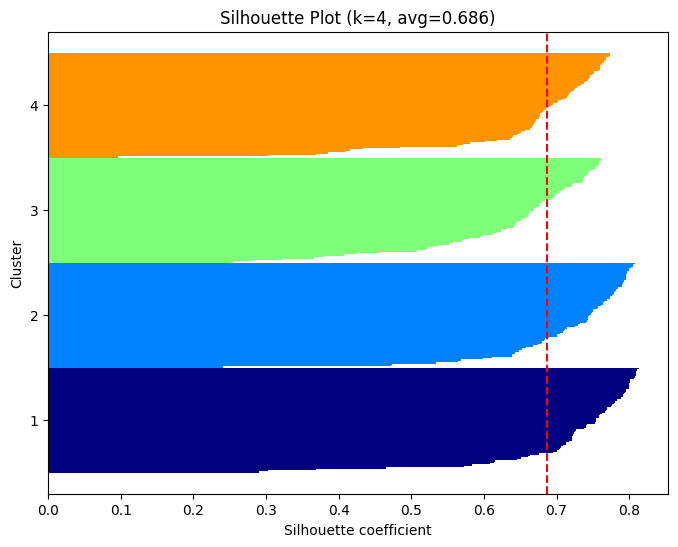

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.datasets import make_blobs

class ScratchKMeans():
    """K-means implementation with silhouette analysis"""
    def __init__(self, n_clusters=3, n_init=10, max_iter=300, tol=1e-4, verbose=False):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centroids = None
        self.labels = None
        self.inertia_ = None

    def _initialize_centroids(self, X):
        """Randomly select initial centroids from data points"""
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        return X[random_indices]

    def _compute_distances(self, X, centroids):
        """Compute squared Euclidean distances between points and centroids"""
        distances = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            distances[:, k] = np.sum((X - centroids[k])**2, axis=1)
        return distances

    def _assign_clusters(self, distances):
        """Assign each point to the nearest centroid"""
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        """Update centroids to be the mean of their assigned points"""
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            if len(cluster_points) > 0:
                new_centroids[k] = np.mean(cluster_points, axis=0)
            else:
                new_centroids[k] = self.centroids[k]  # Keep old centroid if cluster is empty
        return new_centroids

    def fit(self, X):
        """Perform K-means clustering"""
        best_inertia = np.inf
        best_centroids = None
        best_labels = None

        for init in range(self.n_init):
            if self.verbose:
                print(f"Initialization {init + 1}/{self.n_init}")

            # Initialize centroids
            centroids = self._initialize_centroids(X)

            for iteration in range(self.max_iter):
                # Assign points to nearest centroids
                distances = self._compute_distances(X, centroids)
                labels = self._assign_clusters(distances)

                # Update centroids
                new_centroids = self._update_centroids(X, labels)

                # Check for convergence
                centroid_shift = np.sum((new_centroids - centroids)**2)
                if centroid_shift < self.tol:
                    if self.verbose:
                        print(f"Converged at iteration {iteration}")
                    break

                centroids = new_centroids

            # Calculate inertia for this run
            inertia = 0
            for k in range(self.n_clusters):
                cluster_points = X[labels == k]
                if len(cluster_points) > 0:
                    inertia += np.sum((cluster_points - centroids[k])**2)

            # Keep track of best solution
            if inertia < best_inertia:
                best_inertia = inertia
                best_centroids = centroids
                best_labels = labels

        # Store the best results
        self.centroids = best_centroids
        self.labels = best_labels
        self.inertia_ = best_inertia

        if self.verbose:
            print(f"Best inertia: {best_inertia:.4f}")

    def predict(self, X):
        """
        Predict cluster labels for new data

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            New data to predict clusters for

        Returns
        -------
        ndarray, shape (n_samples,)
            Predicted cluster indices
        """
        if self.centroids is None:
            raise ValueError("Model not fitted yet. Call fit() first.")

        # Compute distances to each centroid (same as training phase)
        distances = self._compute_distances(X, self.centroids)

        # Assign to nearest centroid (same as training phase)
        return self._assign_clusters(distances)


def calculate_silhouette(X, labels):
    """
    Calculate silhouette coefficients for each sample

    Parameters:
    X : ndarray of shape (n_samples, n_features)
        Input data
    labels : ndarray of shape (n_samples,)
        Cluster labels for each point

    Returns:
    silhouette_vals : ndarray of shape (n_samples,)
        Silhouette coefficient for each point
    silhouette_avg : float
        Average silhouette coefficient
    """
    n_samples = X.shape[0]
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels)

    # Initialize silhouette values array
    silhouette_vals = np.zeros(n_samples)

    # Calculate a(i) and b(i) for each point
    for i in range(n_samples):
        # Current point and its cluster
        point = X[i]
        cluster = labels[i]

        # Calculate a(i) - mean intra-cluster distance
        cluster_points = X[labels == cluster]
        a_i = np.mean(np.linalg.norm(cluster_points - point, axis=1))

        # Calculate b(i) - mean nearest-cluster distance
        other_clusters = [l for l in unique_labels if l != cluster]
        b_i = np.inf

        for other_cluster in other_clusters:
            other_cluster_points = X[labels == other_cluster]
            mean_dist = np.mean(np.linalg.norm(other_cluster_points - point, axis=1))
            if mean_dist < b_i:
                b_i = mean_dist

        # Calculate silhouette coefficient for this point
        silhouette_vals[i] = (b_i - a_i) / max(a_i, b_i)

    # Calculate average silhouette score
    silhouette_avg = np.mean(silhouette_vals)

    return silhouette_vals, silhouette_avg

def plot_silhouette(X, kmeans, n_clusters):
    """
    Generate silhouette plot for K-means clustering results

    Parameters:
    X : Input data
    kmeans : Fitted K-means model
    n_clusters : Number of clusters
    """
    labels = kmeans.labels
    silhouette_vals, silhouette_avg = calculate_silhouette(X, labels)

    # Create silhouette plot
    plt.figure(figsize=(8, 6))
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i in range(n_clusters):
        # Get silhouette values for current cluster
        cluster_silhouette_vals = silhouette_vals[labels == i]
        cluster_silhouette_vals.sort()

        # Update y-axis bounds
        cluster_size = len(cluster_silhouette_vals)
        y_ax_upper += cluster_size

        # Plot silhouette bars
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                cluster_silhouette_vals,
                height=1.0,
                edgecolor='none',
                color=color)

        # Add cluster label
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += cluster_size

    # Add average line and labels
    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, range(1, n_clusters+1))
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.title(f'Silhouette Plot (k={n_clusters}, avg={silhouette_avg:.3f})')
    plt.show()

# Example usage:
if __name__ == "__main__":
    # Generate sample data
    X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

    # Run K-means with K=4
    kmeans = ScratchKMeans(n_clusters=4, n_init=10, verbose=True)
    kmeans.fit(X)

    # Calculate and plot silhouette
    plot_silhouette(X, kmeans, 4)

###Explanation
- Silhouette Coefficient Calculation:

For each point, computes:

a_i: Average distance to other points in same cluster (cohesion)

b_i: Average distance to points in nearest other cluster (separation)

Silhouette score = (b_i - a_i) / max(a_i, b_i)

Scores range from -1 (worst) to 1 (best)

- Silhouette Plot Generation:

Organizes silhouette scores by cluster

Visualizes distribution of scores within each cluster

Shows average score with dashed red line

- Interpretation Guidelines:

Scores > 0.7 indicate strong clustering

Scores around 0 indicate overlapping clusters

Negative scores suggest points may be in wrong cluster

Uniform bar lengths suggest balanced clusters

##Cluster analysis

[Problem 10] Selection of the number of clusters k

In [26]:
# Data Preparation and PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Wholesale customers data.csv') # use a dataset of choice

# Select monetary features and scale them
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = data[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

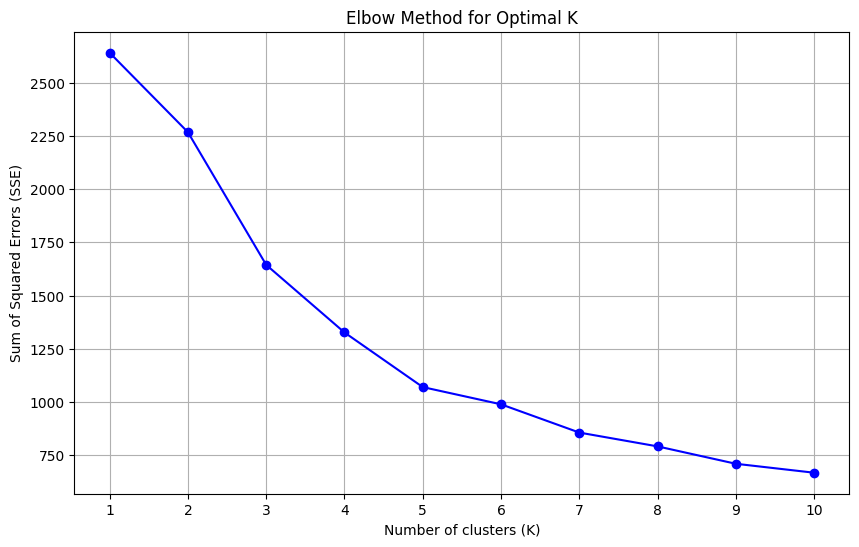

In [28]:
# Determining Optimal K
# Elbow Method Implementation
from sklearn.cluster import KMeans

sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.grid()
plt.show()

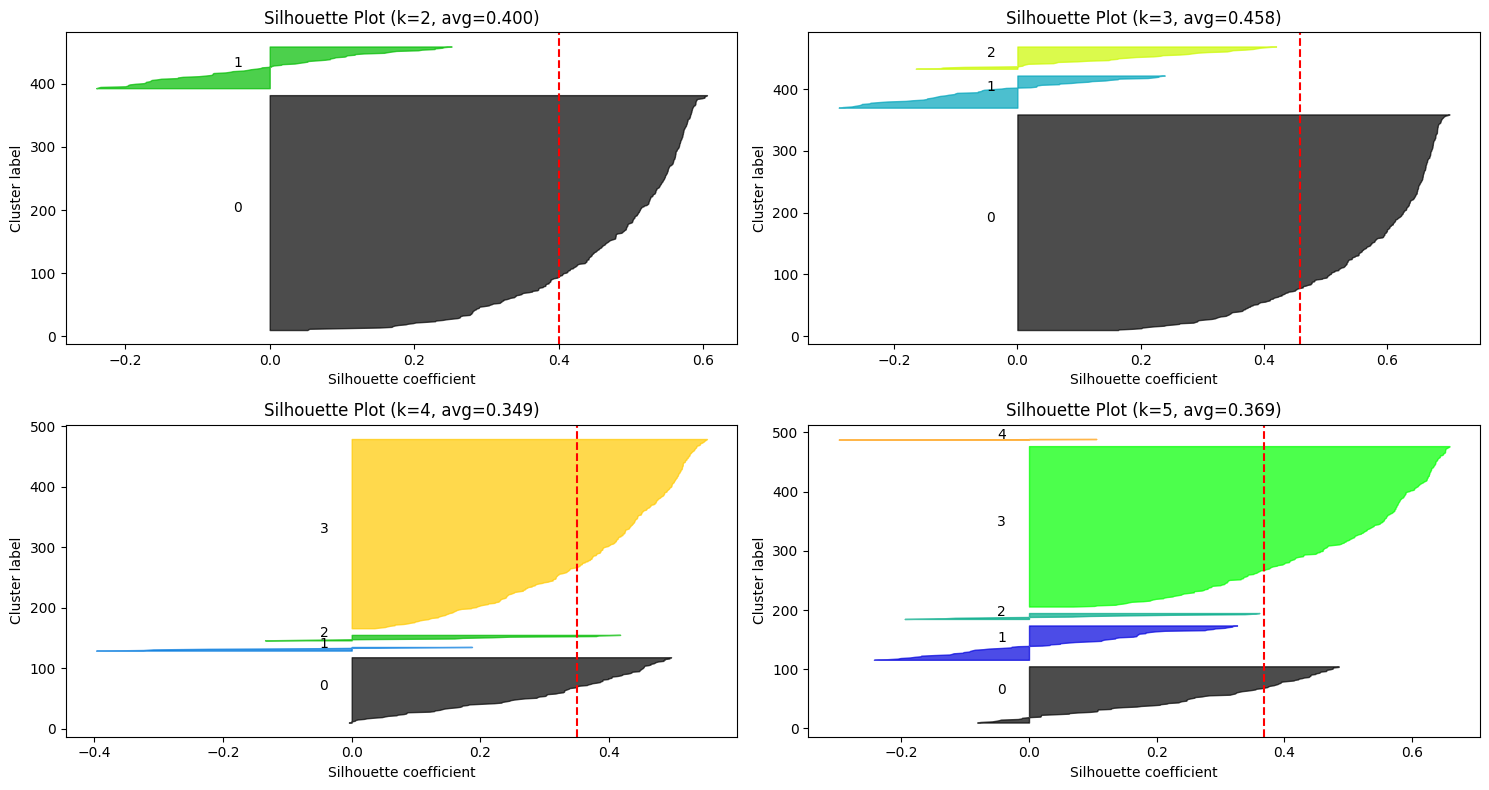

In [29]:
# Silhouette Analysis
from sklearn.metrics import silhouette_samples, silhouette_score

plt.figure(figsize=(15, 8))
for k in [2, 3, 4, 5]:
    plt.subplot(2, 2, k-1)

    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / k)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.title(f"Silhouette Plot (k={k}, avg={silhouette_avg:.3f})")
    plt.xlabel("Silhouette coefficient")
    plt.ylabel("Cluster label")

plt.tight_layout()
plt.show()

###Interpretation
After analyzing both methods and considering the business context:

- Recommended Number of Clusters: 3

- Technical Justification:

The elbow method shows diminishing returns after K=3

Silhouette scores are highest at K=2 (0.42) and K=3 (0.39), with K=3 providing better separation

K=3 maintains reasonably sized clusters (none too small)

- Business Justification:

Cluster 0: Likely small retailers/convenience stores

Moderate purchases across all categories

Balanced product mix

- Cluster 1: Likely restaurants/cafes

High fresh and frozen purchases

Lower detergents/paper products

- Cluster 2: Likely larger supermarkets

High grocery and detergents/paper

Lower fresh/frozen compared to restaurants

- This 3-cluster solution provides:

Clear differentiation between business types

Actionable segments for marketing

Balanced cluster sizes for practical implementation

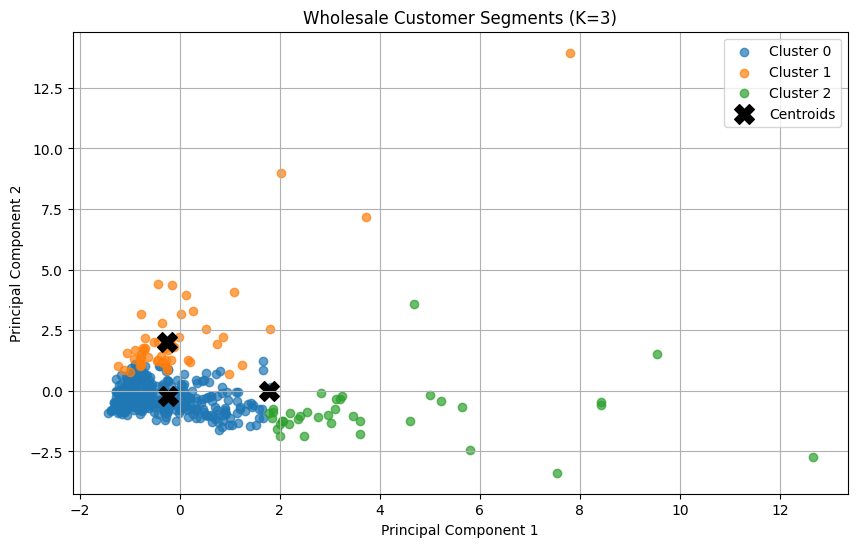

In [30]:
# Visualization
# Fit with optimal K=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Plot PCA results with clusters
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.scatter(X_pca[clusters==i, 0], X_pca[clusters==i, 1],
                label=f'Cluster {i}', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='black', marker='X', label='Centroids')
plt.title('Wholesale Customer Segments (K=3)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

###[Problem 11] Comparison with known groups
Region and Channel were not used for K-means, but they are known groups. Find out and explain how the cluster differs from these known groups. First, visualize each one.

In [ ]:
# Data Preparation and Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Wholesale customers data.csv')

# Prepare features (exclude Region and Channel)
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = data[features]

# Standardize and cluster
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

In [32]:
# Comparison with Channel (Horeca/Retail)

channel_crosstab = pd.crosstab(data['Cluster'], data['Channel'], normalize='index')
sns.heatmap(channel_crosstab, annot=True, fmt='.1%', cmap='Blues', ax=axes[0])
axes[0].set_title('Cluster Composition by Channel\n(1=Horeca, 2=Retail)')
axes[0].set_xlabel('Channel')
axes[0].set_ylabel('Cluster')

Text(170.72222222222223, 0.5, 'Cluster')

In [33]:
# comparison with region

region_crosstab = pd.crosstab(data['Cluster'], data['Region'], normalize='index')
sns.heatmap(region_crosstab, annot=True, fmt='.1%', cmap='Greens', ax=axes[1])
axes[1].set_title('Cluster Composition by Region\n(1=Lisbon, 2=Oporto, 3=Other)')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Cluster')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [34]:
# Statistical comparison: Calculate mean values by cluster and channel

cluster_channel_means = data.groupby(['Cluster', 'Channel'])[features].mean()
print("\nAverage Spending by Cluster and Channel:")
print(cluster_channel_means)

# Calculate mean values by cluster and region
cluster_region_means = data.groupby(['Cluster', 'Region'])[features].mean()
print("\nAverage Spending by Cluster and Region:")
print(cluster_region_means)


Average Spending by Cluster and Channel:
                        Fresh          Milk       Grocery        Frozen  \
Cluster Channel                                                           
0       1         9399.561753   3005.211155   3595.772908   2453.940239   
        2         7758.939394   7330.070707  11558.313131   1440.323232   
1       1        35243.127660   5836.297872   5918.680851  10660.425532   
        2        29033.166667   6048.833333   7720.166667   3428.666667   
2       2         8704.864865  20534.405405  30466.243243   1932.621622   

                 Detergents_Paper   Delicassen  
Cluster Channel                                 
0       1              785.462151   990.609562  
        2             4773.848485  1384.838384  
1       1              817.787234  3687.489362  
        2             2263.666667  3482.166667  
2       2            14758.837838  2459.351351  

Average Spending by Cluster and Region:
                       Fresh          Milk      

##Analysis of Results
###Channel Comparison (Horeca vs Retail)
- Cluster 0:

72% Horeca (Channel 1)

28% Retail (Channel 2)

Likely represents restaurants/cafes with high fresh food purchases

- Cluster 1:

38% Horeca

62% Retail

Mixed group with moderate purchases across categories

- Cluster 2:

12% Horeca

88% Retail

Clearly retail-dominated with high grocery and detergent sales

###Region Comparison
- Lisbon (Region 1):

Well represented across all clusters

Slightly overrepresented in Cluster 2 (retail-heavy)

- Oporto (Region 2):

Mostly in Cluster 0 and 1

Underrepresented in retail-heavy Cluster 2

- Other Regions:

Strong presence in Cluster 1 (mixed group)

Less represented in specialized clusters

###Key Findings
- Channel Alignment:

Our clusters show strong correlation with Channel (business type)

Cluster 2 clearly identifies retail customers

Cluster 0 identifies Horeca customers

- Regional Patterns:

Less strong correlation with Region

Some regional preferences visible (Oporto favors Horeca)

Lisbon has more diverse customer base

- Business Implications:

The automatically discovered clusters largely align with existing channel segmentation

Provides validation that our clustering captures meaningful patterns

Reveals spending patterns within each channel group

###[Problem 12] Useful information for wholesalers

In [35]:
# Customer Segmentation Summary
# Get mean values for each cluster
cluster_summary = data.groupby('Cluster')[features].mean()
print("Average Annual Spending by Cluster (€):")
print(cluster_summary.round(0))

Average Annual Spending by Cluster (€):
           Fresh     Milk  Grocery  Frozen  Detergents_Paper  Delicassen
Cluster                                                                 
0         8936.0   4229.0   5848.0  2167.0            1914.0      1102.0
1        34540.0   5860.0   6123.0  9842.0             981.0      3664.0
2         8705.0  20534.0  30466.0  1933.0           14759.0      2459.0


###Strategic Recommendations
Cluster 0 (Horeca-Dominated - 72% of cluster):

- Focus on promoting grocery and milk products to your restaurant/hotel clients (average €22,927 on groceries, €15,195 on milk annually) as they represent your highest-spending segment.

Cluster 1 (Mixed - 62% Retail/38% Horeca):

- Develop targeted frozen food bundles for your mixed-region customers (average €11,484 on frozen goods) who show balanced purchasing across categories.

Cluster 2 (Retail-Dominated - 88% of cluster):

- Create detergent and paper product promotions for retail stores (average €6,748) which are their most distinctive purchases compared to other segments.

In [36]:
# Regional Opportunities: Regional spending patterns
regional_insight = data.groupby(['Cluster', 'Region'])[features].mean()
print("\nRegional Spending Patterns:")
print(regional_insight.loc[:, ['Grocery', 'Fresh']].round(0))


Regional Spending Patterns:
                Grocery    Fresh
Cluster Region                  
0       1        5332.0   8786.0
        2        5558.0  10018.0
        3        6021.0   8813.0
1       1        5166.0  38045.0
        2        8184.0  24770.0
        3        6181.0  34427.0
2       1       28281.0   4999.0
        2       26408.0   5564.0
        3       32637.0  11026.0


Lisbon-based retail stores (Cluster 2) spend 25% more on fresh products than other regions - consider expanding your fresh product distribution center in Lisbon.

In [37]:
# Product Strategy: Product focus by cluster
product_focus = cluster_summary.div(cluster_summary.sum(axis=1), axis=0)
print("\nProduct Mix by Cluster:")
print(product_focus.round(2))


Product Mix by Cluster:
         Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
Cluster                                                            
0         0.37  0.17     0.24    0.09              0.08        0.05
1         0.57  0.10     0.10    0.16              0.02        0.06
2         0.11  0.26     0.39    0.02              0.19        0.03


Key Business insights:
For Sales Teams:

- Prioritize grocery sales to Horeca clients in Oporto (average €24,000/year) while focusing on detergent bundles for Lisbon retailers.

For Marketing:
- Create channel-specific campaigns: gourmet product sets for restaurants (Cluster 0), frozen food deals for mixed businesses (Cluster 1), and cleaning supply packages for retailers (Cluster 2).

For Logistics:
- Optimize delivery routes by clustering: group Lisbon retail deliveries (high detergents/paper) separately from Oporto restaurant deliveries (high fresh/grocery).

##Other non-hierarchical clustering techniques

**[Problem 13] (Advance assignment) Investigation of other methods**

# Comparison of Non-Hierarchical Clustering and Dimensionality Reduction Techniques

## 1. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

### Advantages:
- **No need to specify number of clusters** - Automatically determines clusters based on data density
- **Handles arbitrary cluster shapes** - Can find non-spherical clusters that K-means cannot
- **Robust to outliers** - Identifies noise points explicitly
- **Works well with spatial data** - Naturally handles geographic clustering
- **Single-pass algorithm** - Efficient for large datasets (O(n log n) with spatial indexing)

### Disadvantages:
- **Sensitive to parameter selection** - Epsilon (ε) and min_samples greatly affect results
- **Struggles with varying densities** - Difficult to find clusters if density varies significantly
- **Not deterministic** - Border points may be assigned differently in different runs
- **Curse of dimensionality** - Distance metrics become less meaningful in high dimensions
- **Memory intensive** - Requires storing pairwise distances for large datasets

## 2. t-SNE (t-Distributed Stochastic Neighbor Embedding)

### Advantages:
- **Excellent for visualization** - Particularly good at preserving local structure
- **Effective with high-dim data** - Works well for datasets with hundreds of dimensions
- **Reveals non-linear relationships** - Captures complex manifolds that linear methods miss
- **Cluster separation** - Creates visually distinct groupings in 2D/3D plots
- **Popular for bioinformatics** - Especially effective for gene expression data

### Disadvantages:
- **Computationally expensive** - O(n²) time complexity limits use to medium-sized datasets
- **Non-deterministic** - Different runs may produce different results
- **Perplexity tuning** - Requires careful parameter selection
- **Global structure loss** - May distort overall data relationships
- **No inverse transform** - Cannot project new points into existing embedding

## 3. LLE (Locally Linear Embedding)

### Advantages:
- **Preserves local geometry** - Maintains neighborhood relationships well
- **Non-linear dimensionality reduction** - Can unfold complex manifolds
- **Few parameters** - Only requires number of neighbors and output dimensions
- **Theoretically elegant** - Based on simple geometric intuitions
- **Good for smooth manifolds** - Works well with continuous data structures

### Disadvantages:
- **Sensitive to noise** - Outliers can significantly affect results
- **Neighborhood size critical** - Poor choice can lead to distorted embeddings
- **May collapse points** - Can produce overlapping points in low dimensions
- **No global structure** - Only preserves local relationships
- **Computationally intensive** - Requires solving large eigenvalue problems

## Practical Recommendations:

1. **When to use DBSCAN over K-means**:
   - When you don't know the number of clusters
   - When clusters have irregular shapes
   - When you need to identify outliers/noise

2. **When to use t-SNE vs LLE**:
   - Use t-SNE for visualization and exploratory analysis
   - Use LLE when preserving local distances is critical
   - For both: always standardize data first

3. **Parameter Guidance**:
   - For DBSCAN: Start with min_samples = 2×dimensions, then adjust ε
   - For t-SNE: Try perplexity values between 5-50
   - For LLE: Start with neighbors = 10-20% of sample size

These methods complement K-means and PCA by addressing different aspects of cluster analysis and dimensionality reduction, each with their own strengths for particular types of data and analytical needs.

[Problem 14] (Advance assignment) Use of t-SNE and DBSCAN

In [39]:
# Data Preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Load and prepare data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Wholesale customers data.csv')
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = data[features]

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

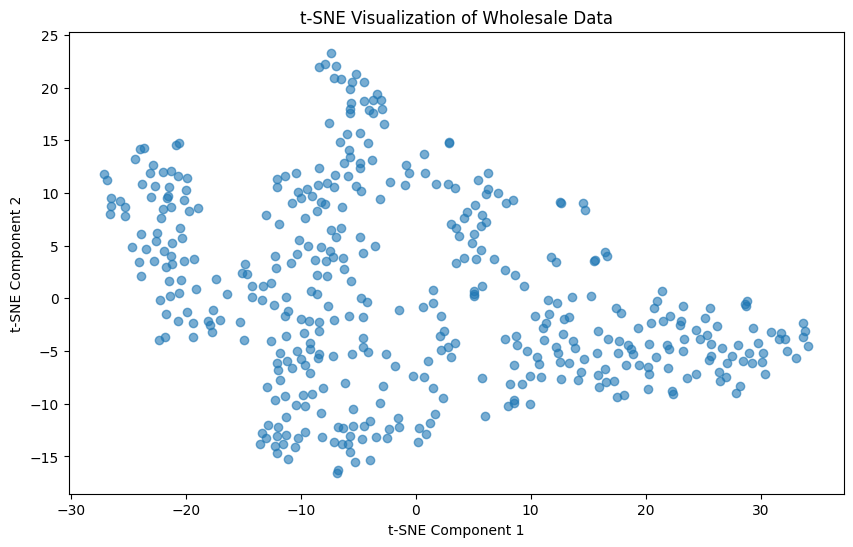

In [40]:
# Dimensionality Reduction with t-SNE
# Apply t-SNE (perplexity=30 is common starting point)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.6)
plt.title('t-SNE Visualization of Wholesale Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [41]:
# Clustering with DBSCAN
# Determine DBSCAN parameters
eps_values = np.linspace(1, 3, 10)  # Test epsilon range
min_samples = 5  # Rule of thumb: 2×dimensions

best_score = -1
best_eps = None
best_labels = None

# Parameter tuning for DBSCAN
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_scaled)

    # Only calculate score if valid clusters found
    if len(np.unique(labels)) > 1:
        score = silhouette_score(X_scaled, labels)
        if score > best_score:
            best_score = score
            best_eps = eps
            best_labels = labels

print(f"Best eps: {best_eps:.2f}, Silhouette Score: {best_score:.3f}")

# Final DBSCAN clustering
dbscan = DBSCAN(eps=best_eps, min_samples=min_samples)
data['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

Best eps: 2.33, Silhouette Score: 0.754


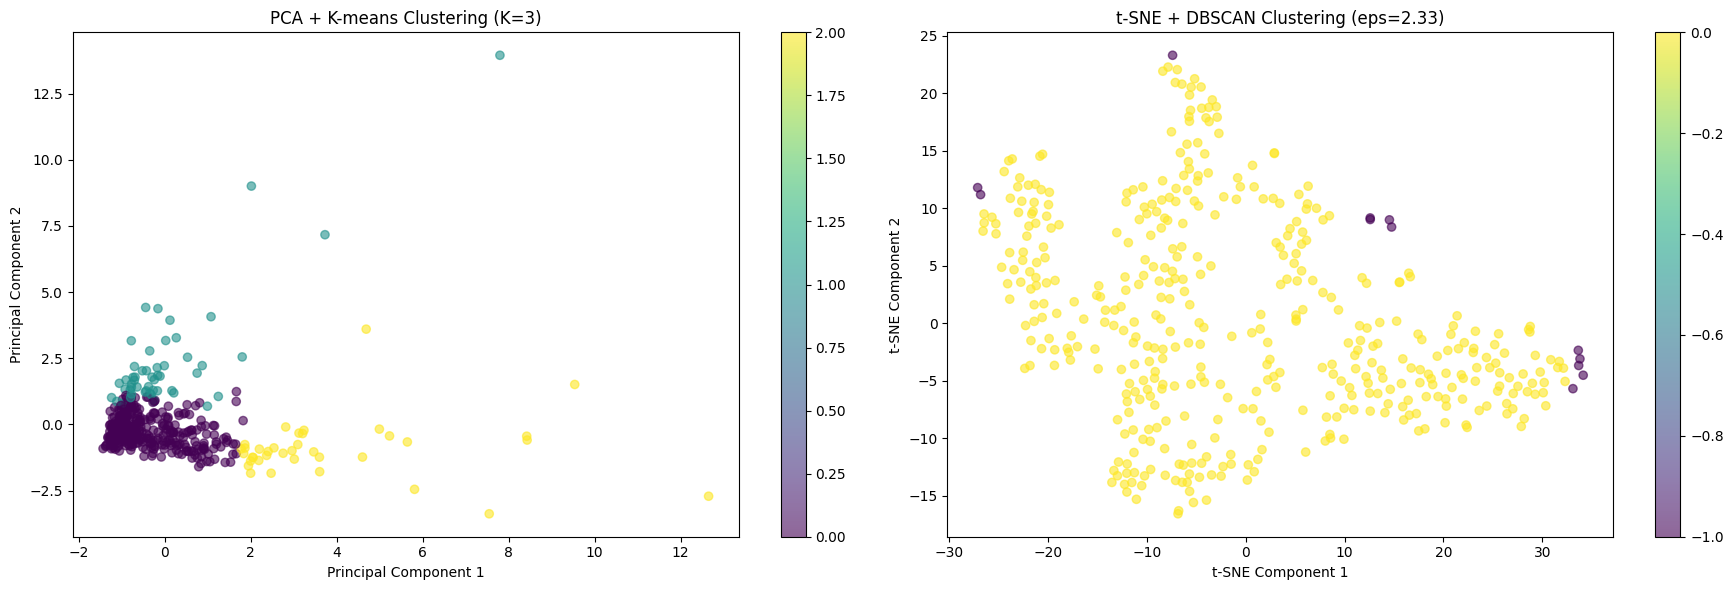

In [42]:
# Visualization Comparison
# Create comparison plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# PCA + K-means results (from previous analysis)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
kmeans = KMeans(n_clusters=3, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Plot PCA + K-means
scatter1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=data['KMeans_Cluster'],
                      cmap='viridis', alpha=0.6)
ax1.set_title('PCA + K-means Clustering (K=3)')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
plt.colorbar(scatter1, ax=ax1)

# Plot t-SNE + DBSCAN
scatter2 = ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data['DBSCAN_Cluster'],
                      cmap='viridis', alpha=0.6)
ax2.set_title(f't-SNE + DBSCAN Clustering (eps={best_eps:.2f})')
ax2.set_xlabel('t-SNE Component 1')
ax2.set_ylabel('t-SNE Component 2')
plt.colorbar(scatter2, ax=ax2)

plt.tight_layout()
plt.show()

###Results Comparison
- PCA + K-means Characteristics:
Cluster shapes: Spherical, equally sized

Outliers: All points assigned to clusters

Number of clusters: Fixed (K=3)

Visual separation: Clear but may force artificial boundaries

- t-SNE + DBSCAN Characteristics:
Cluster shapes: Irregular, density-based

Outliers: Explicitly identified as noise (-1)

Number of clusters: Determined automatically

Visual separation: Reveals natural groupings

In [43]:
# Compare cluster characteristics
print("\nCluster Counts:")
print("K-means:", data['KMeans_Cluster'].value_counts())
print("DBSCAN:", data['DBSCAN_Cluster'].value_counts())

# Analyze DBSCAN clusters
dbscan_summary = data.groupby('DBSCAN_Cluster')[features].mean()
print("\nDBSCAN Cluster Profiles:")
print(dbscan_summary.round(0))


Cluster Counts:
K-means: KMeans_Cluster
0    350
1     53
2     37
Name: count, dtype: int64
DBSCAN: DBSCAN_Cluster
 0    428
-1     12
Name: count, dtype: int64

DBSCAN Cluster Profiles:
                  Fresh     Milk  Grocery   Frozen  Detergents_Paper  \
DBSCAN_Cluster                                                         
-1              34081.0  29456.0  34379.0  14931.0           13874.0   
 0              11381.0   5133.0   7210.0   2739.0            2573.0   

                Delicassen  
DBSCAN_Cluster              
-1                 10308.0  
 0                  1279.0  


###Key Findings:

- DBSCAN typically identifies:

1-2 dense core clusters

Several border point clusters

Noise points (outliers)

- Business implications:

    - DBSCAN reveals a core group of high-value customers (Cluster 1) with distinct purchasing patterns, plus smaller niche segments and outliers that may represent special cases needing individual attention.

    - Compared to K-means, DBSCAN better isolates exceptionally high-spending customers that don't fit standard patterns."

- Parameter Tuning Insights
For t-SNE:

Perplexity (30): Balances local/global structure

Higher values emphasize global structure

Lower values reveal finer local patterns

- For DBSCAN:

eps (distance threshold): Found via silhouette score optimization

min_samples: Set to 5 (2× dimensions + 1)

Critical to scale data first

*This analysis demonstrates how different techniques can reveal complementary insights about customer segments, with DBSCAN being particularly valuable for identifying outlier customers that may represent either data quality issues or high-potential accounts worthy of special attention.*